# Titanic Dataset with Multilayer Perceptron in Tensorflow

## Improvements
1. Try with Name included, considering most occuring titles to derive weight for survival
2. Try with Cabin included, compare survival rate of having a cabin (1) vs not having a cabin (0)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
import tensorflow as tf
from sklearn.preprocessing import Binarizer

In [3]:
#import data
train = pd.read_csv("train.csv", encoding = 'utf8')
test = pd.read_csv("test.csv", encoding = 'utf8')
l=len(train)
lt=len(test)

## Trainning Data

In [4]:
display(train.head())
train.describe()
test_passenger_id=test["PassengerId"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Test Data

In [5]:
display(test.head())
test.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Pre-Processing

In [6]:
#Remove features not used
for n in [train, test]:
    n.drop(labels=["PassengerId", "Name", "Cabin", "Ticket"], axis=1, inplace=True)
    
display("Training Data:",train.head(),"Testing Data:",test.head())


'Training Data:'

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


'Testing Data:'

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [7]:
for n in [train, test]:
    for c in ["Age", "Fare"]:
        n[c].fillna(np.mean(n[c]), inplace=True)
        print(np.mean(n[c]))

29.699117647058763
32.2042079685746
30.272590361445815
35.6271884892086


In [8]:
#Empty spaces in embarked
train_null = train[train.isnull().any(axis=1)]

display (train_null)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [9]:
#No more empty spaces (NaN)
test_null = test[test.isnull().any(axis=1)]

display (test_null)
display(len(test[test.isnull().values==True]))

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


0

In [10]:
c1 = Counter(train.iloc[:,7])
print (c1.most_common(1))


[('S', 644)]


In [11]:
train.iloc[:,7].fillna('S', inplace=True)

## Trainning Data Visualisation

#### Pclass Data

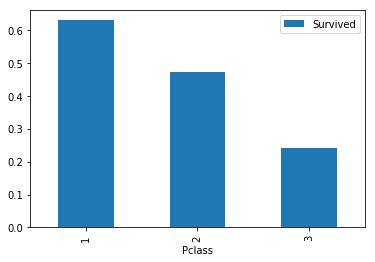

In [12]:
pclass_plot = train.pivot_table(index = "Pclass", values = "Survived")
pclass_plot.plot.bar()
plt.show()

In [13]:
display(train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False))

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Sex Data

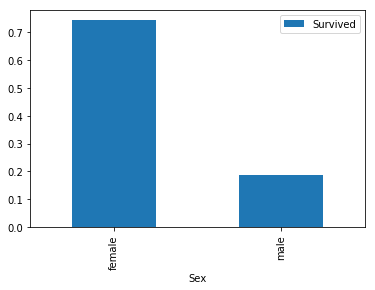

In [14]:
sex_plot = train.pivot_table(index = "Sex", values = "Survived")
sex_plot.plot.bar()
plt.show()

#### Age Data

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


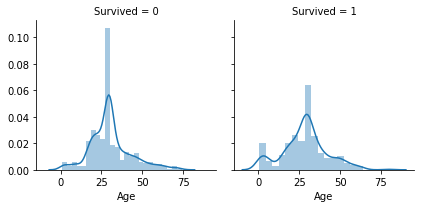

In [15]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

#### Sibsp Data

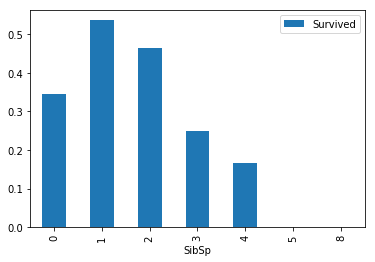

In [16]:
sibsp_plot = train.pivot_table(index = "SibSp", values = "Survived")
sibsp_plot.plot.bar()
plt.show()

#### Parch Data

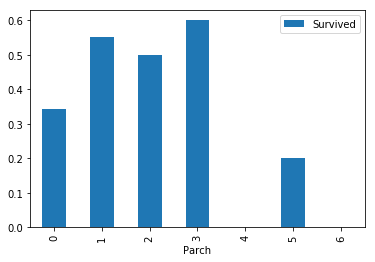

In [17]:
parch_plot = train.pivot_table(index = "Parch", values = "Survived")
parch_plot.plot.bar()
plt.show()

#### Fare Data

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


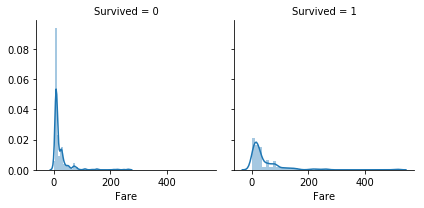

In [18]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Fare")

#### Embarked Data

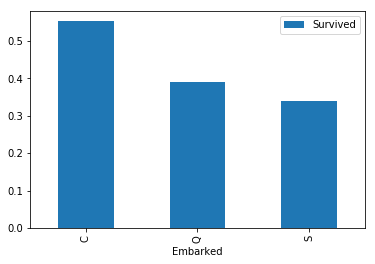

In [19]:
embarked_plot = train.pivot_table(index = "Embarked", values = "Survived")
embarked_plot.plot.bar()
plt.show()

### Dataset Modifications

In [20]:
train['Family']=train['SibSp']+train['Parch']
test['Family']=test['SibSp']+test['Parch']

In [21]:
min_max_scaler = preprocessing.MinMaxScaler()
for dt in [train, test]:
       for c in ["Age", "Fare"]:
           dt[c] = min_max_scaler.fit_transform(dt[[c]].values.astype(float))

In [22]:
def sparse(series,col): 
    for c in col:
        series = pd.concat([series, pd.get_dummies(series[c], prefix=c)], axis=1)
        series = series.drop(c, axis=1)
        return series

In [23]:
# Value of 1 represents female
train=sparse(train,['Sex']) 
train=sparse(train,['Embarked'])
train=sparse(train,["Pclass"]) 
train.drop(labels=["Sex_male"], axis=1, inplace=True)
test=sparse(test,['Sex']) 
test=sparse(test,['Embarked'])
test=sparse(test,["Pclass"]) 
test.drop(labels=["Sex_male"], axis=1, inplace=True)

In [24]:
train.drop(labels=["SibSp","Parch"], axis=1, inplace=True)
test.drop(labels=["SibSp","Parch"], axis=1, inplace=True)

In [25]:
display(train.head(),test.head())

,Survived,Age,Fare,Family,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0.271174,0.014151,1,0,0,0,1,0,0,1
1,1,0.472229,0.139136,1,1,1,0,0,1,0,0
2,1,0.321438,0.015469,0,1,0,0,1,0,0,1
3,1,0.434531,0.103644,1,1,0,0,1,1,0,0
4,0,0.434531,0.015713,0,0,0,0,1,0,0,1


,Age,Fare,Family,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.452723,0.015282,0,0,0,1,0,0,0,1
1,0.617566,0.013663,1,1,0,0,1,0,0,1
2,0.815377,0.018909,0,0,0,1,0,0,1,0
3,0.353818,0.016908,0,0,0,0,1,0,0,1
4,0.287881,0.023984,2,1,0,0,1,0,0,1


In [26]:
labels=train.iloc[:,0]
print(labels.shape)
display(labels[0:5])
train.drop(labels=["Survived"], axis=1, inplace=True)

(891,)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Building Neural Network

In [27]:
size=int(train.shape[0] * 0.9)
#Creating validation set
X_train = train[:size].values
Y_train= np.reshape(labels[:size].values,(size,1))

X_val=train[size:].values
Y_val= np.reshape(labels[size:].values,(train.shape[0]-size,1))

print("X_train:{}".format(X_train.shape))
print("Y_train:{}".format(Y_train.shape))
print("X_val:{}".format(X_val.shape))
print("Y_val:{}".format(Y_val.shape))

X_train:(801, 10)
Y_train:(801, 1)
X_val:(90, 10)
Y_val:(90, 1)


In [28]:
learning_rate = 0.001
epochs = 200
batch_size = 100
prob_test=0.5

In [29]:
#layers
h1_n=32
h2_n=32
h3_n=32
h4_n=64

#weights initialization using xavier
k_in=tf.contrib.layers.xavier_initializer()

In [30]:
 class ReturnValue(object):
    def __init__(self, x, y,p,prob, cost,optimizer, accuracy):
      self.x = x
      self.y = y
      self.p = p
      self.prob = prob
      self.cost = cost
      self.optimizer = optimizer
      self.accuracy = accuracy

In [31]:
x = tf.placeholder(tf.float32, [None, train.shape[1]])
y = tf.placeholder(tf.float32, [None, 1])
prob = tf.placeholder("float")
print(x.shape)

(?, 10)


In [32]:
# Neural Network
    
def feedfwd(x,y,prob):  
    
    h1_layer = tf.layers.dense(x, h1_n, kernel_initializer=k_in)
    h1_layer = tf.layers.batch_normalization(h1_layer, training=True)
    h1_layer = tf.nn.relu(h1_layer)
    h1_layer = tf.nn.dropout(h1_layer,keep_prob=prob,seed=1)
    
    h2_layer = tf.layers.dense(h1_layer, h2_n,kernel_initializer=k_in)
    h2_layer = tf.layers.batch_normalization(h2_layer, training=True)
    h2_layer = tf.nn.relu(h2_layer)
    h2_layer = tf.nn.dropout(h2_layer,keep_prob=prob,seed=1)
    
    h3_layer = tf.layers.dense(h2_layer, h3_n,kernel_initializer=k_in)
    h3_layer = tf.layers.batch_normalization(h3_layer, training=True)
    h3_layer = tf.nn.relu(h3_layer)
    h3_layer = tf.nn.dropout(h3_layer,keep_prob=prob,seed=1)
    
    h4_layer = tf.layers.dense(h3_layer, h4_n,kernel_initializer=k_in)
    h4_layer = tf.layers.batch_normalization(h4_layer, training=True)
    h4_layer = tf.nn.relu(h4_layer)
    h4_layer = tf.nn.dropout(h4_layer,keep_prob=prob,seed=1)
    
    output = tf.layers.dense(h3_layer, 1, activation=None) # h4 not used
    
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=output))
    
    p = tf.nn.sigmoid(output)
    comparison = tf.equal(tf.round(p), y)
    accuracy = tf.reduce_mean(tf.cast(comparison, tf.float32))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
        
    return ReturnValue(x, y,p,prob, cost,optimizer, accuracy)
    

In [33]:
nn = feedfwd(x,y,prob)

e=np.linspace(1, epochs, num=epochs)
losses=np.zeros((2,epochs))
accuracies=np.zeros((2,epochs))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        
        batch = int(len(X_train) / batch_size)
        X_batches = np.array_split(X_train, batch)
        Y_batches = np.array_split(Y_train, batch)
        
        for i in range(batch):
            batch_X, batch_Y = X_batches[i], Y_batches[i]
            tr_p,tr_opt, tr_loss, tr_acc = sess.run([nn.p,nn.optimizer, nn.cost,  nn.accuracy], feed_dict={nn.x: batch_X,nn.y: batch_Y,nn.prob:prob_test})
                        
        val_loss, val_acc = sess.run([nn.cost, nn.accuracy], feed_dict={nn.x: X_val,nn.y: Y_val,nn.prob:prob_test})   
        
        #Collect Data
        losses[0][epoch]=tr_loss   
        losses[1][epoch]=val_loss
        accuracies[0][epoch]=tr_acc
        accuracies[1][epoch]=val_acc
        
        print("Epoch:",epoch + 1,"/", epochs,"Train Loss:",'%.3f' % tr_loss,"Validation Loss:",'%.3f' % val_loss,
              "Train Accuracy:",'%.3f' % tr_acc,"Validation Accuracy:",'%.3f' % val_acc)
                      
                    
    tf.train.Saver().save(sess, "./titanic.ckpt")
    

Epoch: 1 / 200 Train Loss: 0.757 Validation Loss: 0.721 Train Accuracy: 0.540 Validation Accuracy: 0.589
Epoch: 2 / 200 Train Loss: 0.709 Validation Loss: 0.802 Train Accuracy: 0.610 Validation Accuracy: 0.533
Epoch: 3 / 200 Train Loss: 0.798 Validation Loss: 0.642 Train Accuracy: 0.590 Validation Accuracy: 0.611
Epoch: 4 / 200 Train Loss: 0.630 Validation Loss: 0.776 Train Accuracy: 0.670 Validation Accuracy: 0.556
Epoch: 5 / 200 Train Loss: 0.599 Validation Loss: 0.744 Train Accuracy: 0.680 Validation Accuracy: 0.567
Epoch: 6 / 200 Train Loss: 0.669 Validation Loss: 0.752 Train Accuracy: 0.640 Validation Accuracy: 0.600
Epoch: 7 / 200 Train Loss: 0.641 Validation Loss: 0.698 Train Accuracy: 0.640 Validation Accuracy: 0.633
Epoch: 8 / 200 Train Loss: 0.597 Validation Loss: 0.697 Train Accuracy: 0.650 Validation Accuracy: 0.667
Epoch: 9 / 200 Train Loss: 0.712 Validation Loss: 0.607 Train Accuracy: 0.690 Validation Accuracy: 0.700
Epoch: 10 / 200 Train Loss: 0.615 Validation Loss: 0.72

Epoch: 83 / 200 Train Loss: 0.417 Validation Loss: 0.462 Train Accuracy: 0.820 Validation Accuracy: 0.778
Epoch: 84 / 200 Train Loss: 0.414 Validation Loss: 0.429 Train Accuracy: 0.820 Validation Accuracy: 0.800
Epoch: 85 / 200 Train Loss: 0.441 Validation Loss: 0.471 Train Accuracy: 0.800 Validation Accuracy: 0.789
Epoch: 86 / 200 Train Loss: 0.399 Validation Loss: 0.463 Train Accuracy: 0.840 Validation Accuracy: 0.756
Epoch: 87 / 200 Train Loss: 0.388 Validation Loss: 0.484 Train Accuracy: 0.870 Validation Accuracy: 0.811
Epoch: 88 / 200 Train Loss: 0.430 Validation Loss: 0.488 Train Accuracy: 0.820 Validation Accuracy: 0.811
Epoch: 89 / 200 Train Loss: 0.404 Validation Loss: 0.476 Train Accuracy: 0.850 Validation Accuracy: 0.789
Epoch: 90 / 200 Train Loss: 0.386 Validation Loss: 0.496 Train Accuracy: 0.800 Validation Accuracy: 0.822
Epoch: 91 / 200 Train Loss: 0.405 Validation Loss: 0.487 Train Accuracy: 0.820 Validation Accuracy: 0.822
Epoch: 92 / 200 Train Loss: 0.470 Validation L

Epoch: 163 / 200 Train Loss: 0.419 Validation Loss: 0.369 Train Accuracy: 0.830 Validation Accuracy: 0.844
Epoch: 164 / 200 Train Loss: 0.381 Validation Loss: 0.407 Train Accuracy: 0.850 Validation Accuracy: 0.811
Epoch: 165 / 200 Train Loss: 0.371 Validation Loss: 0.418 Train Accuracy: 0.880 Validation Accuracy: 0.856
Epoch: 166 / 200 Train Loss: 0.370 Validation Loss: 0.417 Train Accuracy: 0.850 Validation Accuracy: 0.789
Epoch: 167 / 200 Train Loss: 0.356 Validation Loss: 0.433 Train Accuracy: 0.840 Validation Accuracy: 0.789
Epoch: 168 / 200 Train Loss: 0.380 Validation Loss: 0.451 Train Accuracy: 0.840 Validation Accuracy: 0.789
Epoch: 169 / 200 Train Loss: 0.355 Validation Loss: 0.410 Train Accuracy: 0.850 Validation Accuracy: 0.822
Epoch: 170 / 200 Train Loss: 0.412 Validation Loss: 0.402 Train Accuracy: 0.810 Validation Accuracy: 0.822
Epoch: 171 / 200 Train Loss: 0.400 Validation Loss: 0.399 Train Accuracy: 0.780 Validation Accuracy: 0.822
Epoch: 172 / 200 Train Loss: 0.397 Va

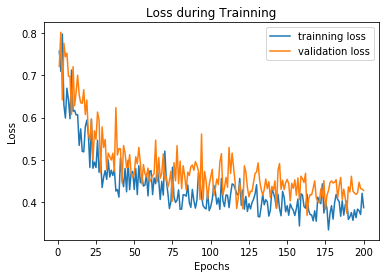

In [34]:
plt.plot(e,losses[0,:],label='trainning loss');
plt.plot(e,losses[1,:],label='validation loss');

plt.legend(loc='upper right');
plt.xlabel('Epochs');
plt.ylabel('Loss');
plt.title('Loss during Trainning');

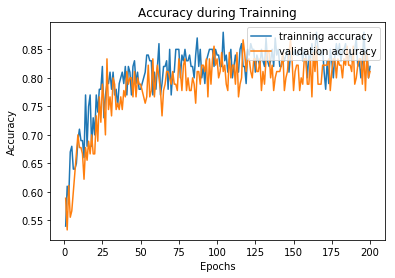

In [35]:
plt.plot(e,accuracies[0,:],label='trainning accuracy');
plt.plot(e,accuracies[1,:],label='validation accuracy');

plt.legend(loc='upper right');
plt.xlabel('Epochs');
plt.ylabel('Accuracy');
plt.title('Accuracy during Trainning');


In [36]:
with tf.Session() as sess:
    tf.train.Saver().restore(sess,"./titanic.ckpt")
    
    test_predict=sess.run(nn.p,feed_dict={nn.x:test,nn.prob:1})
    
print('probability values',test_predict[:5,0])

test_result=Binarizer(0.5).fit_transform(test_predict).astype(np.int32)

print(test_result[0:,0])

INFO:tensorflow:Restoring parameters from ./titanic.ckpt
probability values [0.07138025 0.27163607 0.08435463 0.09053034 0.31576076]
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [37]:
sub=test_passenger_id.to_frame()
sub["Survived"]=test_result
display(sub.head())
sub.to_csv('submission.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
